# Project 1: Suicide Data

Author: Justin Ventura [[jventura3@gulls.salisbury.edu]]

Date: Wednesday, October 14th, 2020.

## - Description -

This dataset contains information about the suicide rates per country from 1987 to 2016.  It contains a few factors about the population in order to derive correlations.

In [84]:
# Libraries we shall be using.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer # start = timer(), end = timer()

s_frame = pd.read_csv("suicide_data.csv")
print('s_frame(row, col) =', s_frame.shape)
s_frame.head(5) # Print the first 9 entries.

s_frame(row, col) = (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Questions to answer:

### A) What type of population is being sampled? What are the “things” getting measured – usually one per row of data.

For this dataset, we have countries being sampled by year.  That is, each row has a country, year, gender, age-group, which are all large groups.

### B) What features does each sample have, i.e. what is being measured?

For each country, there is a corresponding year.  (The best way to group this would be by country, year, gender, age-group)  Then the features for each sampled country by year would be: gender, age group, # of suicides, population size, suicides per 100k population, Human Development Index for the year, GDP for that year, GDP per capita, and what generation the age group is in.

### C) Are the features quantitative or qualitative? Ordinal or nominal? Continuous or discrete?

- Most of the features are quantitative, such as: a given country's population, the # of suicides per 100K, GDP, etc.  Then the only real qualitative feature which I will be focusing on is the gender/generation portion of the data.

- The gender and age groups are nominal features of each sample.  Then the main ordinal feature presented is the HDI (Human Development Index) which, where availible, can be used to compare different samples to see which HDI is higher.  This could be useful down the line.

- Almost every single feature is discrete except for (arguably) the HDI and suicides/100k pop.

### D) Is the data “complete” or do some of the samples have null or absent values for certain features? Why are these samples still useful? Why are they incomplete?

The data is *incomplete.*  Some of the countries are missing values for their respective HDI. (presumably because it was simply not measured for a specific year for whatever reason)  These samples are still useful because if a certain assessment does not factor in HDI, then it is okay for it to be missing.  This is sort of inconvenient for cases which require the analysis of the HDI, but does not make analysis impossible.

### E) Why are these features chosen to be part of the dataset?

These features can be measured and used to make correlations, (correlation $\neq$ causation) guesses, and predictions.

### F) What are some other features that are not included but that you think might make sense to include for this dataset?

I am so glad you ask: this is a very important topic to me for multiple reasons.  Firstly, I am both a huge fan, but also a huge critic of social media.  You may ask: how does that have anything to do with this?  Here is my justification: I believe that the rise of social media (and even entertainment, the internet/world wide web, and the information age as a whole; an argument for another time) is causing the rise in suicide rates.  Secondly, I am a huge advocate for mental health awareness, (stemming from both personal experience,and from my experience with friends & family) so if I could find a reasonable correlation and possibly causation for the (I assume to be) rising suicide rates.

Therefore, I wish this dataset included how many people for the country used social media, if they did, which platforms, and an estimate on how often they used it.  I also would like if the dataset could also include, for those who had taken their own life, a brief description of their mental condition.  For example, maybe include diagnosis for a victim such as "clinically depressed," "anxious," "ADHD."  Maybe even include categories for whether or not the person had a mother/father growing up, if they experienced abuse of some sort, etc.  Some of these features I have mentioned are pretty in-depth, sensitive, and even hard to collect, so I can see why these things were neglected.  However, this does give me motivation for a (pretty far) future data analysis project where I could attempt to get data like this if possible.

### G) Give at least one way that you can pivot the dataset to get a slightly different representation of some values. Explain what this is and how you would use it for a visualization.

I could pivot the data to form a timeline for a specific country grouped by country, gender, age-group, over the index of time.  For simplicity, I will use the year range 2010 to 2012 inclusive.

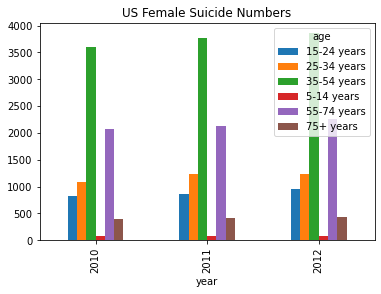

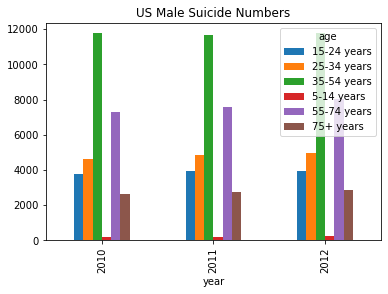

In [85]:
# Organize data.
data = s_frame[['country', 'year', 'sex', 'age', 'suicides_no', 'population']]
data = data[data['country'] == 'United States']
data = data[(data['year'] >= 2010) & (data['year'] <= 2012)]

# Female vs Male
fdat = data[data['sex'] == 'female']
mdat = data[data['sex'] == 'male']

fdat = fdat.pivot_table(index='year', columns='age', values='suicides_no')
mdat = mdat.pivot_table(index='year', columns='age', values='suicides_no')

fdat.plot.bar(title='US Female Suicide Numbers')
mdat.plot.bar(title='US Male Suicide Numbers')

H) Identify any possible relationships between features included in the data: which ones are likely to affect others?

I think the first step is to see if "richer" countries have a higher suicide rate, (normalized by population) and if they do, I cannot prove, but can still make, some assumptions as to why.

Then the next step could be to see if a specific gender or age-group is more susceptible to taking their own lives.  Again, I can make more assumptions that are reasonable but not proved based on my results.

For this example, I will check a timeline of the years on the United States to see if the suicide rates have increased over the years, and compare it to the increasing GDP.

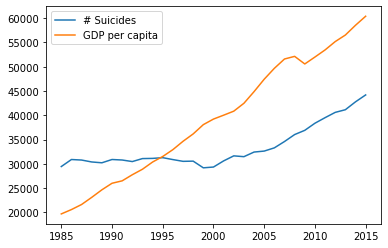

In [112]:
# NOTE: Show at least one plot or visualization to illustrate this (possible) relationship

data = s_frame[['country', 'year', 'suicides_no']]
data2 = s_frame[['country', 'year', 'suicides_no', 'gdp_per_capita ($)']]
data = data[data['country'] == 'United States']
data2 = data2[data2['country'] == 'United States']
del data['country']
del data2['suicides_no']
del data2['country']

data = data.groupby('year').sum()
data2 = data2.groupby('year').max()

plt.plot(data, label='# Suicides')
plt.plot(data2, label='GDP per capita')
plt.legend()
plt.show()

# NOTE: What numerical or statistical techniques might you consider using to determine whether the
#       relationship is reliable?

""" 
We can measure the population ratio to see if the population growth 
is proportional to the suicide counts.
"""

# NOTE: Are there external inferences you think might be possible? For instance, can you hypothesize
#       a relationship with data not included in the dataset? Why or why not?

"""
The first inference to make would be rise of the internet.  The
internet was not really popular until the early 2000s, but as
soon as we reach the the early 2000s, the suicide rate for the
US skyrockets. 

Another possible relation is that around 2001 (the year of 9/11)
the suicide rate skyrockets.
"""

### I) What “extra” features can you perhaps compute from the data? For example, if you have data that includes product dates of purchase, you can “engineer” the data to construct the most popular products over various lengths of time (e.g. a particular holiday season). How might you use this information? Using the holiday example, you might try to correlate holiday sales of a product to some mainstream event that popularized it.

I could possibly compute the percentages of suicide numbers for each gender, (such that %M + %F = 100%) do the same for age-groups, and even for the countries over the years. (I will probably not go that far, but it is possible)